In [10]:
import sys
sys.path.append('../')

import cv2
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
from fddb_reader import *
from equi_augmentation import *
figsize(12, 5)

In [11]:
images = read_fold("../data/FDDB-folds/FDDB-fold-01-ellipseList.txt")

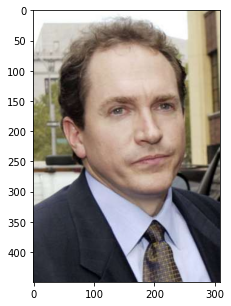

In [12]:
image = draw_image(images[210], draw_faces = False)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
def project_fddb_to_equi(image_data, back, phi, theta, r_h = 1):
    
    image = draw_image(image_data, draw_faces = False)
    
    projected, _, projector = image_projection_to_equi(back, image, phi, theta, r_h = r_h)
    projected_faces = projected.copy()
    
    for face in image_data['faces']:
        
        projected_points = projector(get8boundingpointsy_x(face['bounding_box']))
        t_left, t_center, t_right, c_left, c_right, b_left, b_center, b_right = projected_points
        
        projected_faces = draw_points(projected_faces, projected_points, color = (255,0,0))
    
    plt.imshow(cv2.cvtColor(projected_faces, cv2.COLOR_BGR2RGB))
    plt.show()
        
    return projected

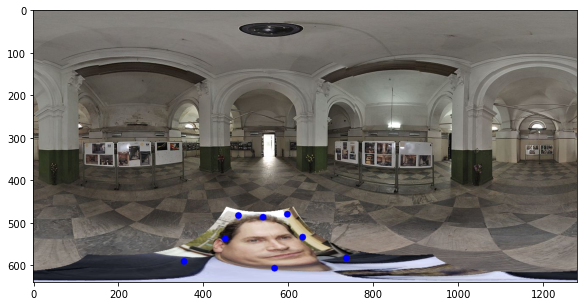

In [21]:
back = cv2.imread("C:/Users/paulo/Pictures/test_faces/equi_images/image (11).JPG", cv2.IMREAD_COLOR)

proj = project_fddb_to_equi(images[210], back, np.radians(70), np.radians(30))